In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from scipy import stats
import sys
import os
# Add the correct relative path to the scripts folder
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [140]:
import cleaned_data_from_db

In [141]:
df= cleaned_data_from_db.df

In [142]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,241538.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,241538.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,241538.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,241538.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,241538.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [143]:
handset_counts = df['Handset Manufacturer'].value_counts()

In [144]:
# Get the top 10 handsets
top_3_manufacturers = handset_counts.head(10)

# Display the top 10 handsets
print(top_3_manufacturers)

Handset Manufacturer
Apple                                   60137
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: count, dtype: int64


In [145]:
# Get the top 10 handsets
top_3_manufacturers = handset_counts.head(3)

# Display the top 10 handsets
print(top_3_manufacturers)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [146]:
top_3_manufacturers = ['Samsung', 'iPhone', 'Nokia']

# Create a dictionary to hold the top 5 handsets for each manufacturer
top_5_handsets = {}

# Iterate over each manufacturer
for manufacturer in top_3_manufacturers:
    # Filter data for the current manufacturer
    manufacturer_data = df[df['Handset Type'].str.contains(manufacturer)]
    
    # Count occurrences of each handset for this manufacturer
    handset_counts = manufacturer_data['Handset Type'].value_counts()
    
    # Get the top 5 handsets
    top_5_handsets[manufacturer] = handset_counts.head(5)

# Display the top 5 handsets for each manufacturer
for manufacturer, handsets in top_5_handsets.items():
    print(f"Top 5 handsets Type for {manufacturer}:")
    print(handsets)
    print()

Top 5 handsets Type for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets Type for iPhone:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets Type for Nokia:
Handset Type
Hmd Global Oy Nokia 7 Plus Ds               34
Nokia 520 Lumia 520 Nokia 520               28
Microsoft Mobile. Nokia Lumia 635 Rm-974    25
Hmd Global Oy Nokia 6 Ss                    15
Nokia Lumia 635 Rm-974                      14
Name: count, dtype: int64



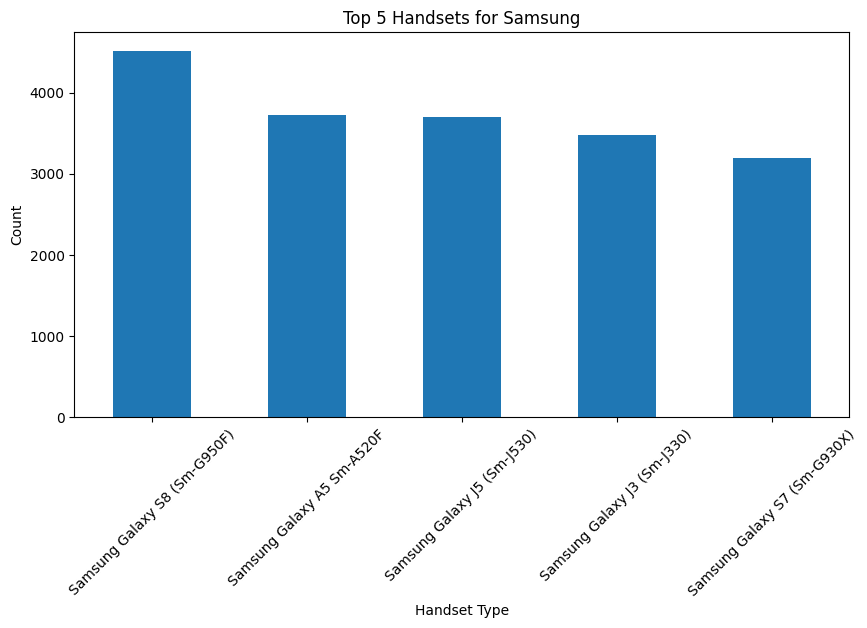

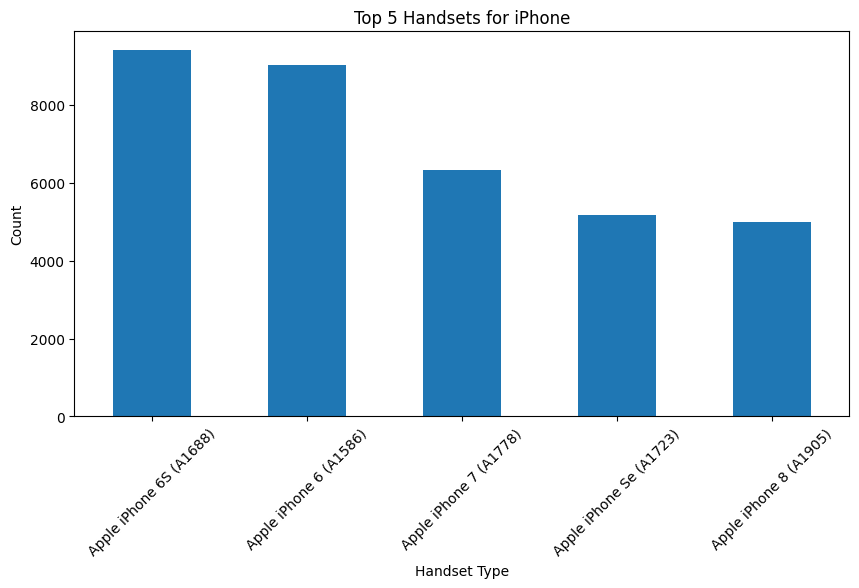

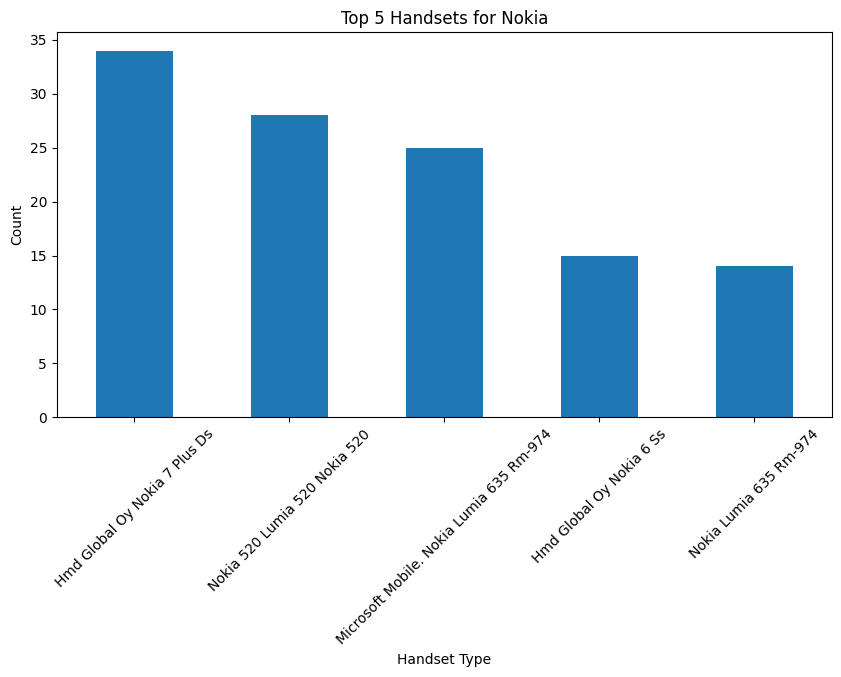

In [147]:
# Plotting the results
for manufacturer, handsets in top_5_handsets.items():
    plt.figure(figsize=(10, 5))
    handsets.plot(kind='bar')
    plt.title(f"Top 5 Handsets for {manufacturer}")
    plt.xlabel("Handset Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [148]:
np_xdr_sessions = df['Bearer Id'].value_counts()

In [149]:
top_10 = np_xdr_sessions.head(10)

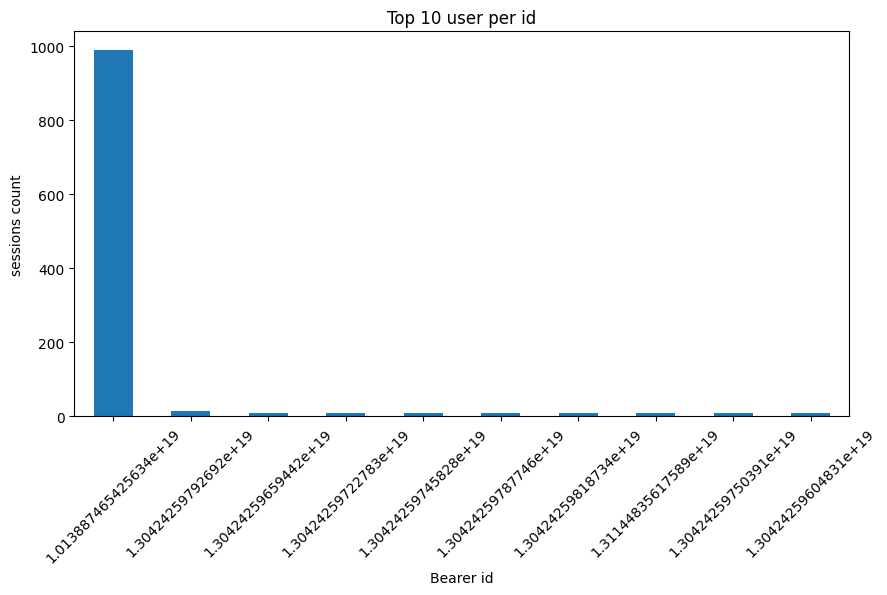

In [150]:
# Plotting the results
plt.figure(figsize=(10, 5))
top_10.plot(kind='bar')
plt.title(f"Top 10 user per id")
plt.xlabel("Bearer id")
plt.ylabel("sessions count")
plt.xticks(rotation=45)
plt.show()

In [151]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,241538.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,241538.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,241538.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,241538.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,241538.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [152]:
sessions_duration = df[['Dur. (ms)', 'Bearer Id']]

In [153]:
sessions_duration

,Dur. (ms),Bearer Id
0,241538.000000,1.311448e+19
1,241538.000000,1.311448e+19
2,241538.000000,1.311448e+19
3,241538.000000,1.311448e+19
4,241538.000000,1.311448e+19
...,...,...
149996,81230.000000,7.277826e+18
149997,97970.000000,7.349883e+18
149998,98249.000000,1.311448e+19
149999,97910.000000,1.311448e+19


In [154]:
top_10_users = sessions_duration.nlargest(10, 'Dur. (ms)')

In [155]:
top_10_users

,Dur. (ms),Bearer Id
125835,347699.0,1.304243e+19
50536,347695.0,1.311448e+19
125681,347678.0,1.304243e+19
50609,347676.0,7.277826e+18
100302,347633.0,1.304243e+19
125510,347627.0,7.349883e+18
25743,347590.0,1.013887e+19
125631,347541.0,1.311448e+19
100416,347522.0,7.349883e+18
100351,347491.0,7.349883e+18


In [156]:
total_dl_ul_per_user = df[['Bearer Id','Total UL (Bytes)','Total DL (Bytes)']]

In [157]:
df['Total_Data_Volume'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

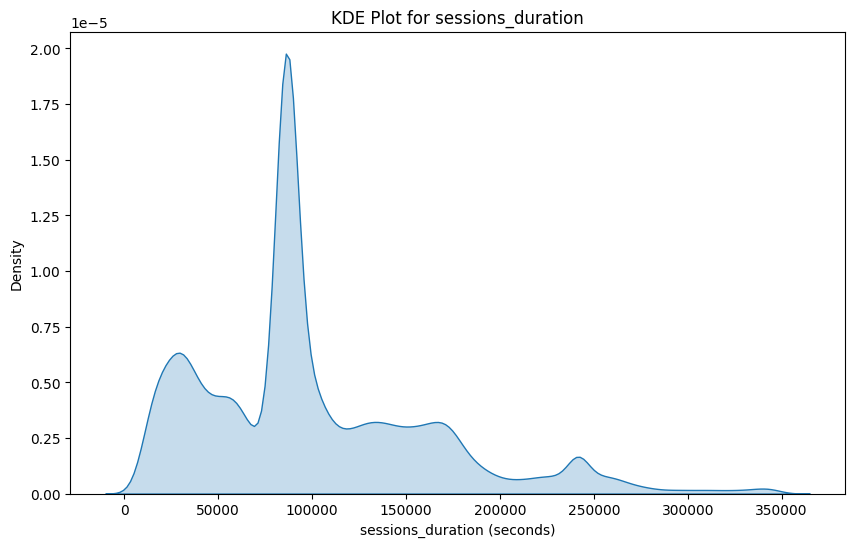

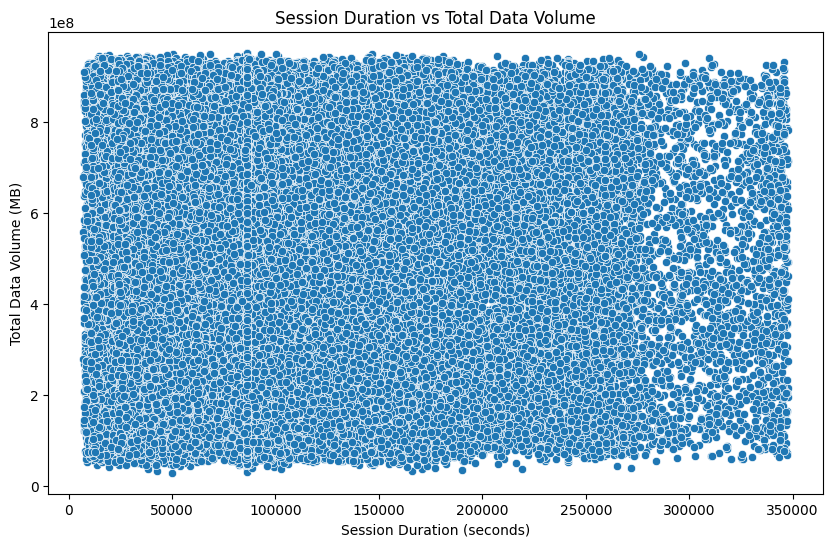

In [158]:
# KDE Plot for Session Duration
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Dur. (ms)'], fill=True)
plt.title('KDE Plot for sessions_duration')
plt.xlabel('sessions_duration (seconds)')
plt.ylabel('Density')
plt.show()

### Bivariate Analysis ###

# Scatter Plot: Session Duration vs Total Data Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dur. (ms)', y='Total_Data_Volume', data=df)
plt.title('Session Duration vs Total Data Volume')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Total Data Volume (MB)')
plt.show()

